# Importando e tratando os dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
dados=pd.read_csv("hotel_bookings.csv")
dados.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Traduzindo o dataset. Como não sei qual a composição da possível equipe de dados que irá utilizar esse material, essa é uma boa prática para facilitar o uso.

In [3]:
dados = dados.rename(columns={'is_canceled': 'se_cancelou', 'lead_time': 'dias_entre_reserva_e_chegada',
                              'arrival_date_year': 'ano_da_viagem', 'arrival_date_month': 'mes_da_viagem',
                              'arrival_date_week_number': 'semana_da_chegada', 'arrival_date_day_of_month': 'dia_da_chegada',
                              'stays_in_weekend_nights': 'no_de_noites_fds', 'stays_in_week_nights': 'no_de_noites_diadesemana',
                              'adults': 'adultos', 'children': 'criancas', 'babies': 'bebes', 'meal': 'refeicao',
                              'country': 'pais', 'market_segment': 'segmento', 'distribution_channel': 'canal_de_distribuicao',
                              'is_repeated_guest': 'se_hospede_recorrente', 'previous_cancellations': 'ja_cancelou',
                              'previous_bookings_not_canceled': 'reservas_anteriores_nao_canceladas',
                              'reserved_room_type': 'tipo_de_quarto', 'assigned_room_type': 'tipo_de_quarto_determinado',
                              'booking_changes': 'no_mudancas_na_reserva', 'deposit_type': 'tipo_de_deposito',
                             'agent': 'agente', 'company': 'companhia', 'days_in_waiting_list': 'dias_na_lista_de_espera',
                             'customer_type': 'tipo_de_reserva', 'adr': 'tarifa_diaria_media', 'required_car_parking_spaces': 'estacionamento',
                             'total_of_special_requests': 'total_de_pedidos_especiais', 'reservation_status': 'status_da_reserva',
                             'reservation_status_date': 'data_do_ultimo_status'})

In [4]:
new_values = {'January': 'Janeiro', 'February': 'Fevereiro', 'March': 'Março', 'April': 'Abril', 'May': 'Maio', 'June': 'Junho',
             'July': 'Julho', 'August': 'Agosto', 'September': 'Setembro', 'October': 'Outubro', 'November': 'Novembro',
             'December': 'Dezembro'}
dados['mes_da_viagem'] = dados['mes_da_viagem'].map(new_values)

In [5]:
new_values2 = {'Resort Hotel': 'Resort', 'City Hotel': 'Hotel urbano'}
dados['hotel'] = dados['hotel'].map(new_values2)

Verificando se existem valores nulos, duplicatas e fazendo a conversão de tipos

In [6]:
dados.isnull().sum()

hotel                                      0
se_cancelou                                0
dias_entre_reserva_e_chegada               0
ano_da_viagem                              0
mes_da_viagem                              0
semana_da_chegada                          0
dia_da_chegada                             0
no_de_noites_fds                           0
no_de_noites_diadesemana                   0
adultos                                    0
criancas                                   4
bebes                                      0
refeicao                                   0
pais                                     488
segmento                                   0
canal_de_distribuicao                      0
se_hospede_recorrente                      0
ja_cancelou                                0
reservas_anteriores_nao_canceladas         0
tipo_de_quarto                             0
tipo_de_quarto_determinado                 0
no_mudancas_na_reserva                     0
tipo_de_de

In [7]:
# vou retirar toda a coluna "companhia", já que não é importante e possui muitos valores nulos

dados.drop(['companhia'], axis=1, inplace=True)

In [8]:
# já no caso das colunas de país e crianças, vou retirar somente as linhas com dados faltantes, não são muitas

dados.dropna(subset=['pais'],inplace=True)
dados.dropna(subset=['criancas'],inplace=True)

In [9]:
# a coluna "agente" irei retirar, pois não é importante para as análises, apesar de conter poucos dados nulos

dados.drop(['agente'], axis=1, inplace=True)

In [10]:
# conferindo se todos os dados nulos foram retirados

dados.isnull().sum()

hotel                                 0
se_cancelou                           0
dias_entre_reserva_e_chegada          0
ano_da_viagem                         0
mes_da_viagem                         0
semana_da_chegada                     0
dia_da_chegada                        0
no_de_noites_fds                      0
no_de_noites_diadesemana              0
adultos                               0
criancas                              0
bebes                                 0
refeicao                              0
pais                                  0
segmento                              0
canal_de_distribuicao                 0
se_hospede_recorrente                 0
ja_cancelou                           0
reservas_anteriores_nao_canceladas    0
tipo_de_quarto                        0
tipo_de_quarto_determinado            0
no_mudancas_na_reserva                0
tipo_de_deposito                      0
dias_na_lista_de_espera               0
tipo_de_reserva                       0


In [11]:
# verificando dados duplicados

dados.duplicated().sum()

31984

In [12]:
# retirando dados duplicados

dados.drop_duplicates(keep = 'first', inplace = True)

In [13]:
# verificando se foram retirados

dados.duplicated().sum()

0

In [14]:
# vamos transformar o tipo da coluna "criancas" para int

dados['criancas']=dados['criancas'].astype('int64')

In [15]:
# agora vou criar uma coluna nova, que receberá o tamanho total das famílias (número de adultos, mais número de crianças e bebês)

dados['tamanho_da_familia']=dados['adultos']+dados['criancas']+dados['bebes']
dados['total_permacencia']=dados['no_de_noites_fds']+dados['no_de_noites_diadesemana']
dados

,hotel,se_cancelou,dias_entre_reserva_e_chegada,ano_da_viagem,mes_da_viagem,semana_da_chegada,dia_da_chegada,no_de_noites_fds,no_de_noites_diadesemana,adultos,...,tipo_de_deposito,dias_na_lista_de_espera,tipo_de_reserva,tarifa_diaria_media,estacionamento,total_de_pedidos_especiais,status_da_reserva,data_do_ultimo_status,tamanho_da_familia,total_permacencia
0,Resort,0,342,2015,Julho,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2,0
1,Resort,0,737,2015,Julho,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2,0
2,Resort,0,7,2015,Julho,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort,0,13,2015,Julho,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort,0,14,2015,Julho,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,Hotel urbano,0,23,2017,Agosto,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2,7
119386,Hotel urbano,0,102,2017,Agosto,35,31,2,5,3,...,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,3,7
119387,Hotel urbano,0,34,2017,Agosto,35,31,2,5,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2,7
119388,Hotel urbano,0,109,2017,Agosto,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2,7


# Explorando os dados

Qual o tamanho do problema relacionado ao cancelamento das reservas? Vamos observar, antes de tudo, qual a porcentagem de reservas que são canceladas como um todo.

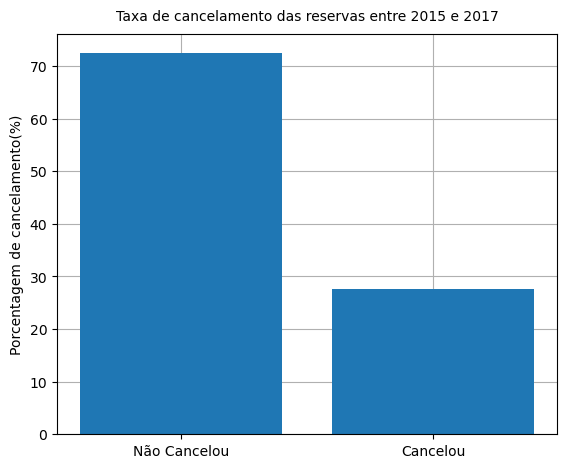

In [16]:
cancelamentos = dados['se_cancelou'].value_counts(normalize=True)*100
nome_cancelou = ['Não Cancelou', 'Cancelou']
cancelamentos.rename({'Canceled': 'Canceladas', 'Not_Canceled':'Não Canceladas'}, inplace=True)

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

indice = range(len(cancelamentos))

eixo.bar(indice, cancelamentos)
eixo.set_title('Taxa de cancelamento das reservas entre 2015 e 2017', fontsize=10, pad=10)
eixo.set_ylabel('Porcentagem de cancelamento(%)', fontsize=10)
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_cancelou)
eixo.grid(True)
eixo.set_axisbelow(True)

Quais são meses em que os hoteis e os resorts são mais frequentados?

Text(0.5, 1.0, 'Movimento por mês')

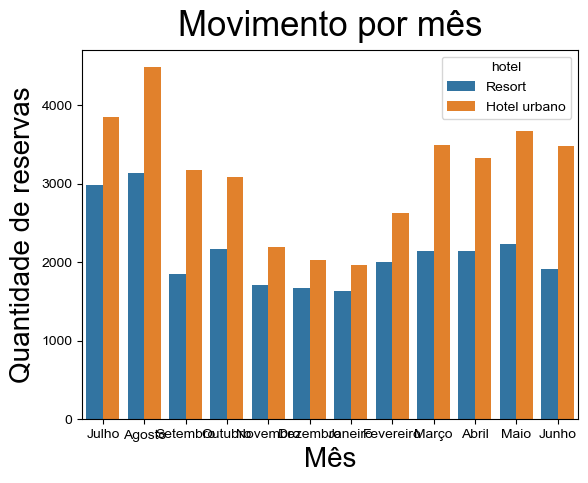

In [17]:
sns.countplot(x ='mes_da_viagem',hue='hotel', data = dados[(dados['se_cancelou'] == 0)],)
sns.set(rc = {'figure.figsize':(30,20)})
plt.xlabel('Mês', fontsize=20)
plt.ylabel('Quantidade de reservas', fontsize=20)
plt.title("Movimento por mês", fontsize=25, pad=10)

Como esperado, o verão foi o periodo com maior procura nos hoteis urbanos e nos resorts. Lembrando que são dados do hemisfério norte, portanto o verão ocorre entre junho e setembro.

Quais são países de origem?

In [18]:
top_paises = dados[(dados['se_cancelou'] == 0)]['pais'].value_counts().reset_index()
top_paises.columns =['pais','contagem']
top_paises = top_paises[:15]
top_paises

,pais,contagem
0,PRT,17653
1,GBR,8446
2,FRA,7104
3,ESP,5388
4,DEU,4332
5,IRL,2348
6,ITA,1990
7,BEL,1670
8,NLD,1561
9,USA,1416


Text(0.5, 1.0, 'Principais países de origem dos hóspedes')

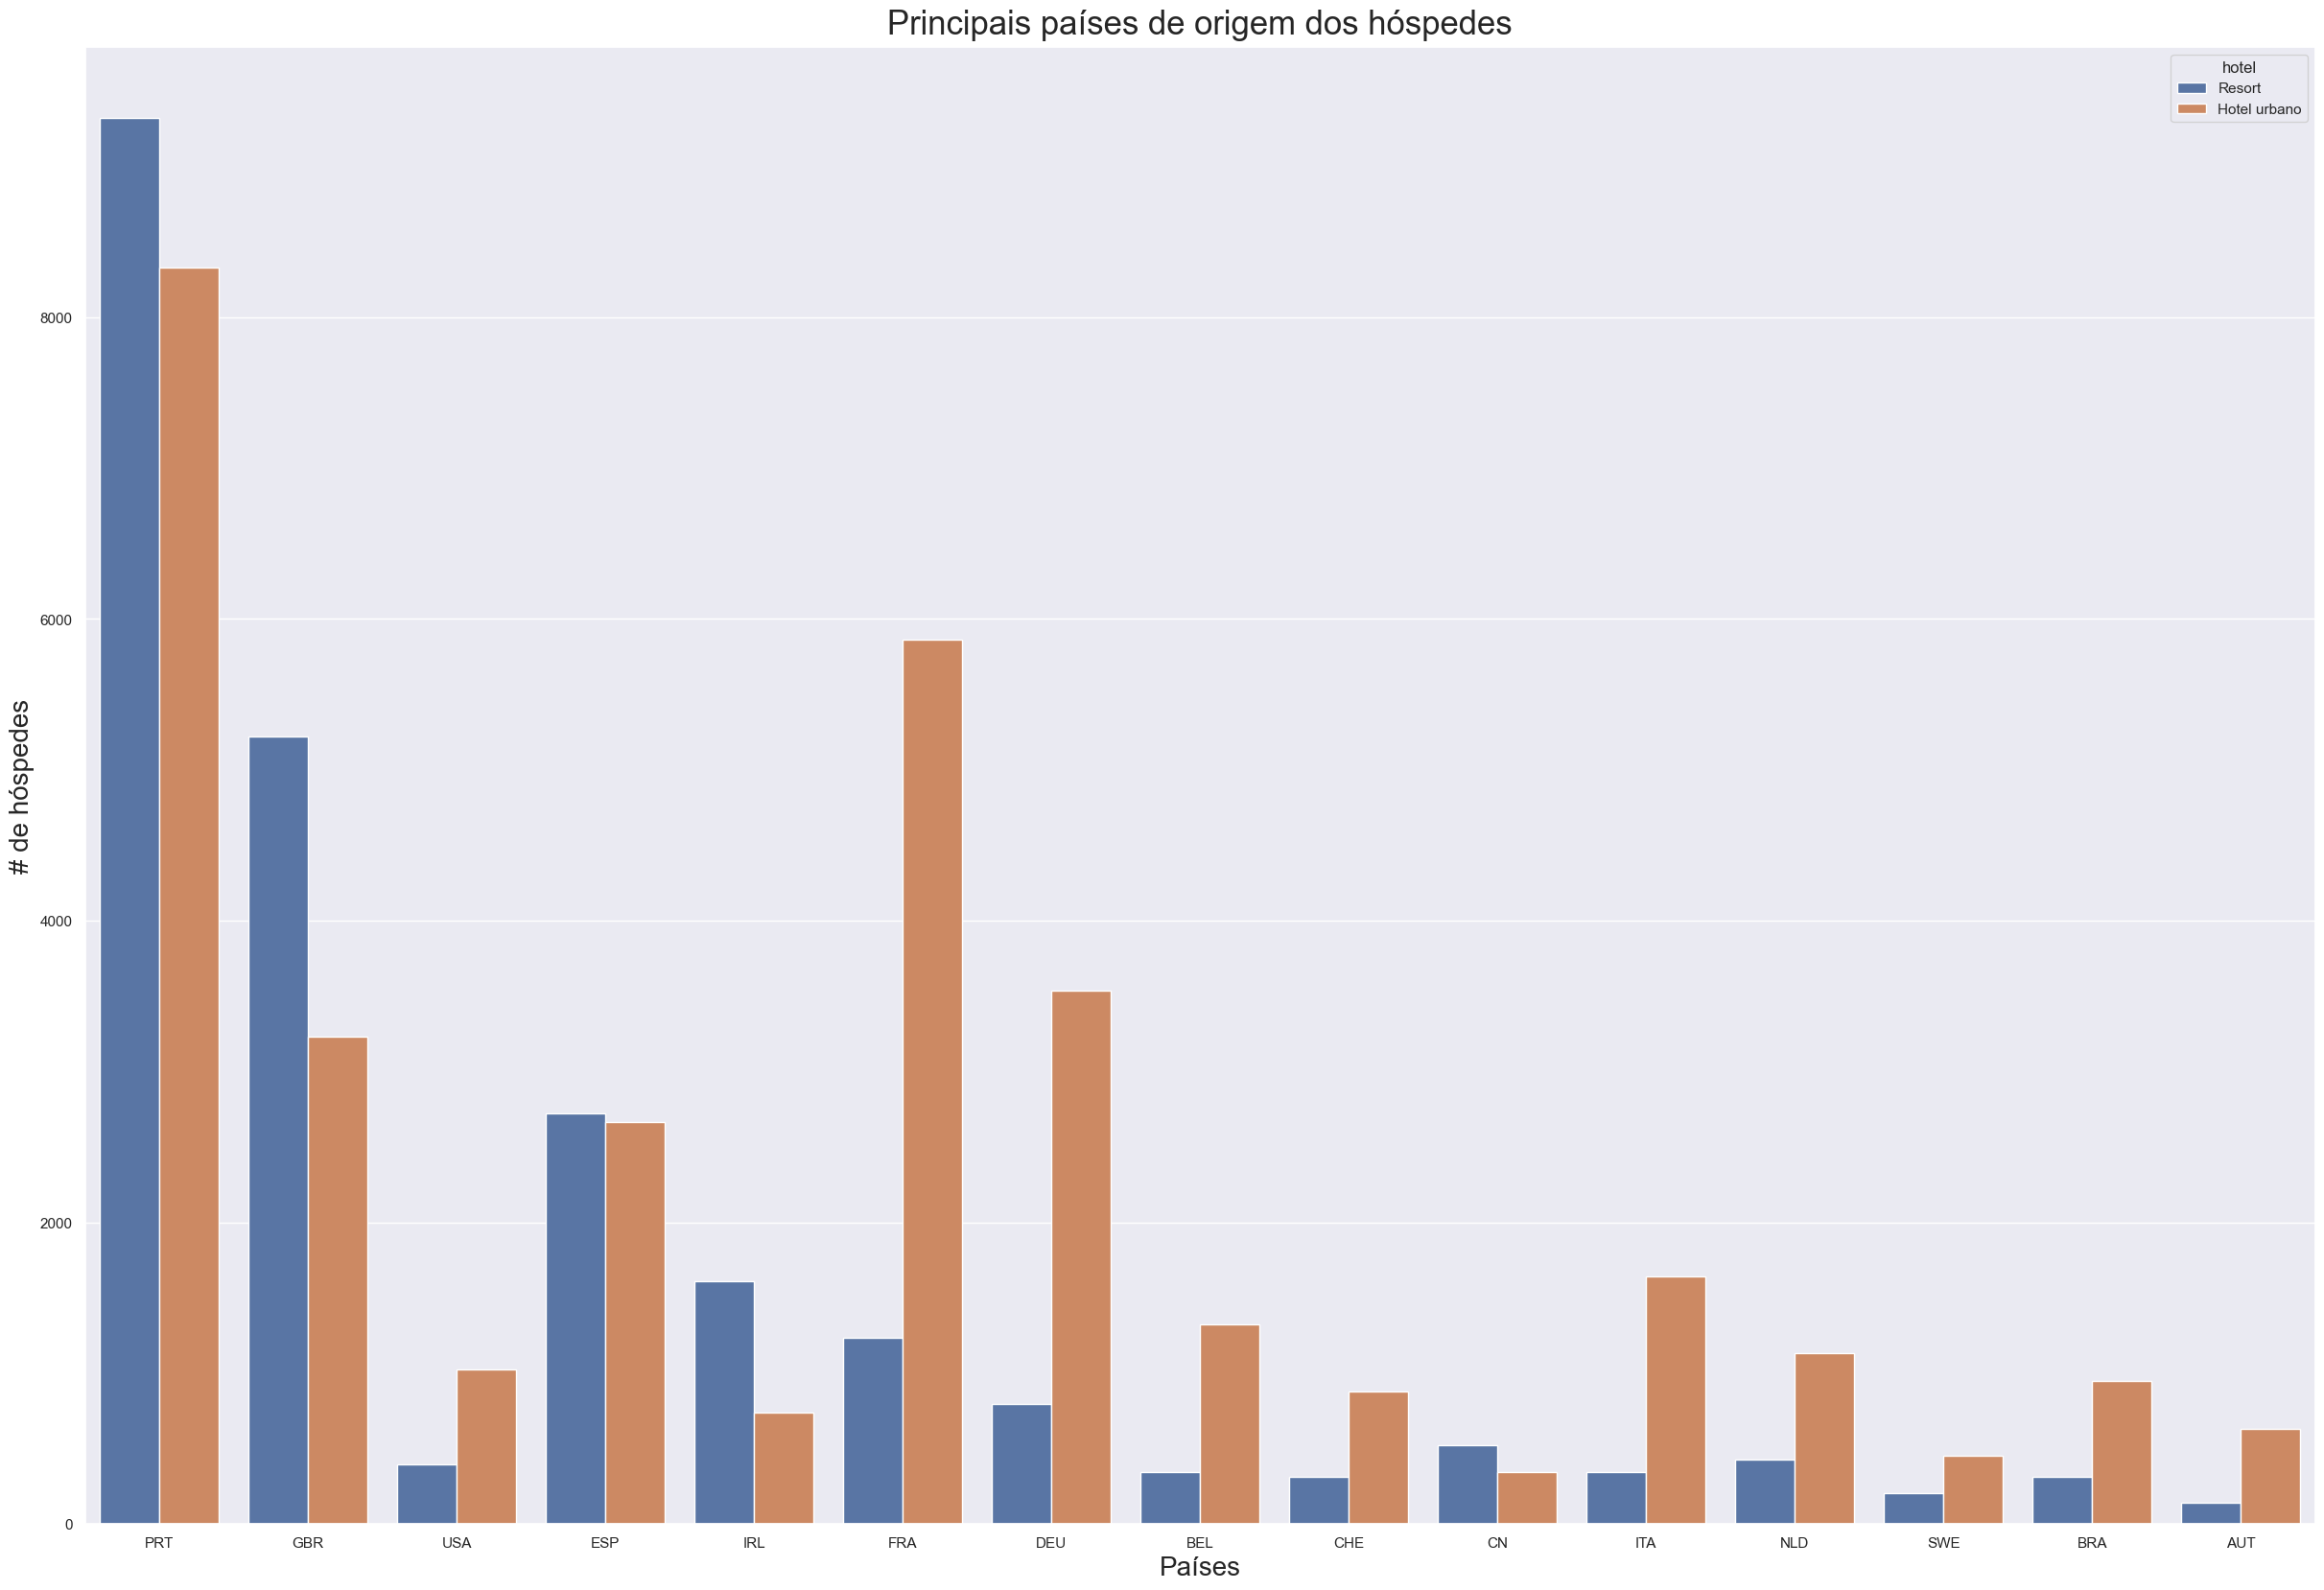

In [19]:
temp = dados[(dados['se_cancelou']==0)]
lista_de_paises=top_paises.pais.unique()
origem_dos_hospedes_por_tipo = temp[temp['pais'].isin(lista_de_paises)]

sns.countplot(x ='pais',hue='hotel', data = origem_dos_hospedes_por_tipo)
sns.set(rc = {'figure.figsize':(15,10)})
plt.xlabel('Países', fontsize=20)
plt.ylabel('# de hóspedes', fontsize=20)
plt.title("Principais países de origem dos hóspedes", fontsize=25, pad=10)

## Preparando o dataset para aplicar os modelos de ML

In [20]:
# Separando a data em três colunas: ano, mês e dia. Isso irá facilitar as análises posteriores.

dados['data_do_ultimo_status'] = pd.to_datetime(dados['data_do_ultimo_status'])

dados['ano'] = dados['data_do_ultimo_status'].dt.year
dados['mes'] = dados['data_do_ultimo_status'].dt.month
dados['dia'] = dados['data_do_ultimo_status'].dt.day

dados.drop(['data_do_ultimo_status'], axis=1, inplace=True)

In [21]:
# Diminuindo os valores únicos na coluna país a criação das variáveis dummy será mais simples

dados['pais'].nunique()
dados.loc[~dados["pais"].isin(lista_de_paises), "pais"] = "Other"
dados['pais'].value_counts()
dados['pais'].nunique()

16

In [22]:
# Diminuindo os valores únicos nas demais colunas

dados['tipo_de_deposito'].nunique()
dados['refeicao'].nunique()
dados['tipo_de_reserva'].nunique()
dados['tipo_de_quarto'].nunique()

10

In [23]:
dados.drop(['semana_da_chegada','dias_na_lista_de_espera', 'ano_da_viagem', 'mes_da_viagem', 'status_da_reserva', 'tipo_de_quarto_determinado'], axis=1, 
           inplace=True)

### Criando as variáveis dummy

In [24]:
dummies = pd.get_dummies(dados, columns=['hotel','refeicao','pais','segmento','canal_de_distribuicao','tipo_de_quarto','tipo_de_deposito','tipo_de_reserva'])
dummies

,se_cancelou,dias_entre_reserva_e_chegada,dia_da_chegada,no_de_noites_fds,no_de_noites_diadesemana,adultos,criancas,bebes,se_hospede_recorrente,ja_cancelou,...,tipo_de_quarto_H,tipo_de_quarto_L,tipo_de_quarto_P,tipo_de_deposito_No Deposit,tipo_de_deposito_Non Refund,tipo_de_deposito_Refundable,tipo_de_reserva_Contract,tipo_de_reserva_Group,tipo_de_reserva_Transient,tipo_de_reserva_Transient-Party
0,0,342,1,0,0,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,1,0,0,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,1,0,2,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,30,2,5,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
119386,0,102,31,2,5,3,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
119387,0,34,31,2,5,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
119388,0,109,31,2,5,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
dummies.drop(['dias_entre_reserva_e_chegada','no_de_noites_fds','no_de_noites_diadesemana','adultos','criancas','bebes',
              'ja_cancelou','reservas_anteriores_nao_canceladas','no_mudancas_na_reserva','tarifa_diaria_media',
              'estacionamento','total_de_pedidos_especiais','total_permacencia','tamanho_da_familia'], axis=1, inplace=True)

In [26]:
dummies

,se_cancelou,dia_da_chegada,se_hospede_recorrente,ano,mes,dia,hotel_Hotel urbano,hotel_Resort,refeicao_BB,refeicao_FB,...,tipo_de_quarto_H,tipo_de_quarto_L,tipo_de_quarto_P,tipo_de_deposito_No Deposit,tipo_de_deposito_Non Refund,tipo_de_deposito_Refundable,tipo_de_reserva_Contract,tipo_de_reserva_Group,tipo_de_reserva_Transient,tipo_de_reserva_Transient-Party
0,0,1,0,2015,7,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,2015,7,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,2015,7,2,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,2015,7,2,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,2015,7,3,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,30,0,2017,9,6,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
119386,0,31,0,2017,9,7,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
119387,0,31,0,2017,9,7,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
119388,0,31,0,2017,9,7,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


### Normalizando os dados

In [27]:
# verificando se existe muita variação no dataset

dados.var().sort_values(ascending=False).head(30)

C:\Users\eders\AppData\Local\Temp\ipykernel_11416\1216494461.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dados.var().sort_values(ascending=False).head(30)


dias_entre_reserva_e_chegada          7413.709808
tarifa_diaria_media                   3020.557642
dia_da_chegada                          78.049088
dia                                     77.307364
mes                                     10.418653
total_permacencia                        7.553911
no_de_noites_diadesemana                 4.177363
reservas_anteriores_nao_canceladas       2.952003
no_de_noites_fds                         1.058473
total_de_pedidos_especiais               0.692024
tamanho_da_familia                       0.630246
no_mudancas_na_reserva                   0.530242
ano                                      0.462696
adultos                                  0.391727
criancas                                 0.208710
se_cancelou                              0.199799
ja_cancelou                              0.136626
estacionamento                           0.078646
se_hospede_recorrente                    0.037706
bebes                                    0.012885


In [28]:
# como existe uma grade variação, normalizei as colunas indicadas

dados_a_normalizar=dados.loc[:, ['dias_entre_reserva_e_chegada','no_de_noites_fds','no_de_noites_diadesemana','adultos','criancas','bebes',
              'ja_cancelou','reservas_anteriores_nao_canceladas','no_mudancas_na_reserva','tarifa_diaria_media',
              'estacionamento','total_de_pedidos_especiais']] 

In [29]:
dados_normalizados=(dados_a_normalizar-dados_a_normalizar.min())/(dados_a_normalizar.max()-dados_a_normalizar.min())
dados_normalizados

,dias_entre_reserva_e_chegada,no_de_noites_fds,no_de_noites_diadesemana,adultos,criancas,bebes,ja_cancelou,reservas_anteriores_nao_canceladas,no_mudancas_na_reserva,tarifa_diaria_media,estacionamento,total_de_pedidos_especiais
0,0.464043,0.000,0.000000,0.036364,0.0,0.0,0.0,0.0,0.142857,0.001180,0.0,0.0
1,1.000000,0.000,0.000000,0.036364,0.0,0.0,0.0,0.0,0.190476,0.001180,0.0,0.0
2,0.009498,0.000,0.024390,0.018182,0.0,0.0,0.0,0.0,0.000000,0.015053,0.0,0.0
3,0.017639,0.000,0.024390,0.018182,0.0,0.0,0.0,0.0,0.000000,0.015053,0.0,0.0
4,0.018996,0.000,0.048780,0.036364,0.0,0.0,0.0,0.0,0.000000,0.019307,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.031208,0.125,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.018963,0.0,0.0
119386,0.138399,0.125,0.121951,0.054545,0.0,0.0,0.0,0.0,0.000000,0.042877,0.0,0.4
119387,0.046133,0.125,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.030351,0.0,0.8
119388,0.147897,0.125,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.020491,0.0,0.0


In [30]:
dados_final = pd.merge(dummies,dados_normalizados , left_index=True, right_index=True)
dados_final

,se_cancelou,dia_da_chegada,se_hospede_recorrente,ano,mes,dia,hotel_Hotel urbano,hotel_Resort,refeicao_BB,refeicao_FB,...,no_de_noites_diadesemana,adultos,criancas,bebes,ja_cancelou,reservas_anteriores_nao_canceladas,no_mudancas_na_reserva,tarifa_diaria_media,estacionamento,total_de_pedidos_especiais
0,0,1,0,2015,7,1,0,1,1,0,...,0.000000,0.036364,0.0,0.0,0.0,0.0,0.142857,0.001180,0.0,0.0
1,0,1,0,2015,7,1,0,1,1,0,...,0.000000,0.036364,0.0,0.0,0.0,0.0,0.190476,0.001180,0.0,0.0
2,0,1,0,2015,7,2,0,1,1,0,...,0.024390,0.018182,0.0,0.0,0.0,0.0,0.000000,0.015053,0.0,0.0
3,0,1,0,2015,7,2,0,1,1,0,...,0.024390,0.018182,0.0,0.0,0.0,0.0,0.000000,0.015053,0.0,0.0
4,0,1,0,2015,7,3,0,1,1,0,...,0.048780,0.036364,0.0,0.0,0.0,0.0,0.000000,0.019307,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,30,0,2017,9,6,1,0,1,0,...,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.018963,0.0,0.0
119386,0,31,0,2017,9,7,1,0,1,0,...,0.121951,0.054545,0.0,0.0,0.0,0.0,0.000000,0.042877,0.0,0.4
119387,0,31,0,2017,9,7,1,0,1,0,...,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.030351,0.0,0.8
119388,0,31,0,2017,9,7,1,0,1,0,...,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.020491,0.0,0.0


### Verificando a correlação entre as variáveis

In [31]:
correlacao = dados_final.corr()
correlacao

,se_cancelou,dia_da_chegada,se_hospede_recorrente,ano,mes,dia,hotel_Hotel urbano,hotel_Resort,refeicao_BB,refeicao_FB,...,no_de_noites_diadesemana,adultos,criancas,bebes,ja_cancelou,reservas_anteriores_nao_canceladas,no_mudancas_na_reserva,tarifa_diaria_media,estacionamento,total_de_pedidos_especiais
se_cancelou,1.000000,0.005227,-0.090171,0.009308,-0.099726,-0.012140,0.068895,-0.068895,-0.038527,-0.000025,...,0.082778,0.080216,0.067010,-0.020950,0.050964,-0.050567,-0.094074,0.126671,-0.183751,-0.121825
dia_da_chegada,0.005227,1.000000,-0.004411,0.013539,-0.001613,0.335727,-0.008949,0.008949,0.009152,0.003192,...,-0.027670,-0.001424,0.015834,-0.000784,-0.008692,0.000656,0.006488,0.022164,0.008666,-0.001666
se_hospede_recorrente,-0.090171,-0.004411,1.000000,0.030288,-0.023274,-0.004232,-0.047219,0.047219,0.069666,-0.004702,...,-0.114698,-0.173241,-0.045912,-0.012993,0.206931,0.447192,0.006063,-0.154557,0.072740,-0.001363
ano,0.009308,0.013539,0.030288,1.000000,-0.496730,-0.032501,0.072422,-0.072422,-0.074367,-0.030224,...,-0.008032,0.034343,0.036025,-0.018776,-0.063511,0.031780,0.018906,0.186248,-0.023410,0.070461
mes,-0.099726,-0.001613,-0.023274,-0.496730,1.000000,0.003954,-0.017106,0.017106,0.011689,0.010594,...,0.013788,-0.012889,-0.001908,0.009692,0.006340,-0.012292,0.017357,0.037658,0.022982,0.080328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reservas_anteriores_nao_canceladas,-0.050567,0.000656,0.447192,0.031780,-0.012292,-0.002844,0.010887,-0.010887,0.046300,-0.004433,...,-0.056944,-0.117781,-0.028486,-0.008859,0.395887,1.000000,0.006020,-0.082906,0.040418,0.027329
no_mudancas_na_reserva,-0.094074,0.006488,0.006063,0.018906,0.017357,0.018653,-0.044157,0.044157,-0.033369,0.032368,...,0.084180,-0.049180,0.030887,0.080932,-0.010498,0.006020,1.000000,0.001780,0.048865,0.015475
tarifa_diaria_media,0.126671,0.022164,-0.154557,0.186248,0.037658,0.008028,0.101560,-0.101560,-0.088740,0.043280,...,0.050859,0.245238,0.326300,0.022779,-0.050240,-0.082906,0.001780,1.000000,0.040467,0.136239
estacionamento,-0.183751,0.008666,0.072740,-0.023410,0.022982,0.002687,-0.215351,0.215351,0.031467,0.016013,...,-0.044023,0.009225,0.037155,0.030555,-0.003482,0.040418,0.048865,0.040467,1.000000,0.048571


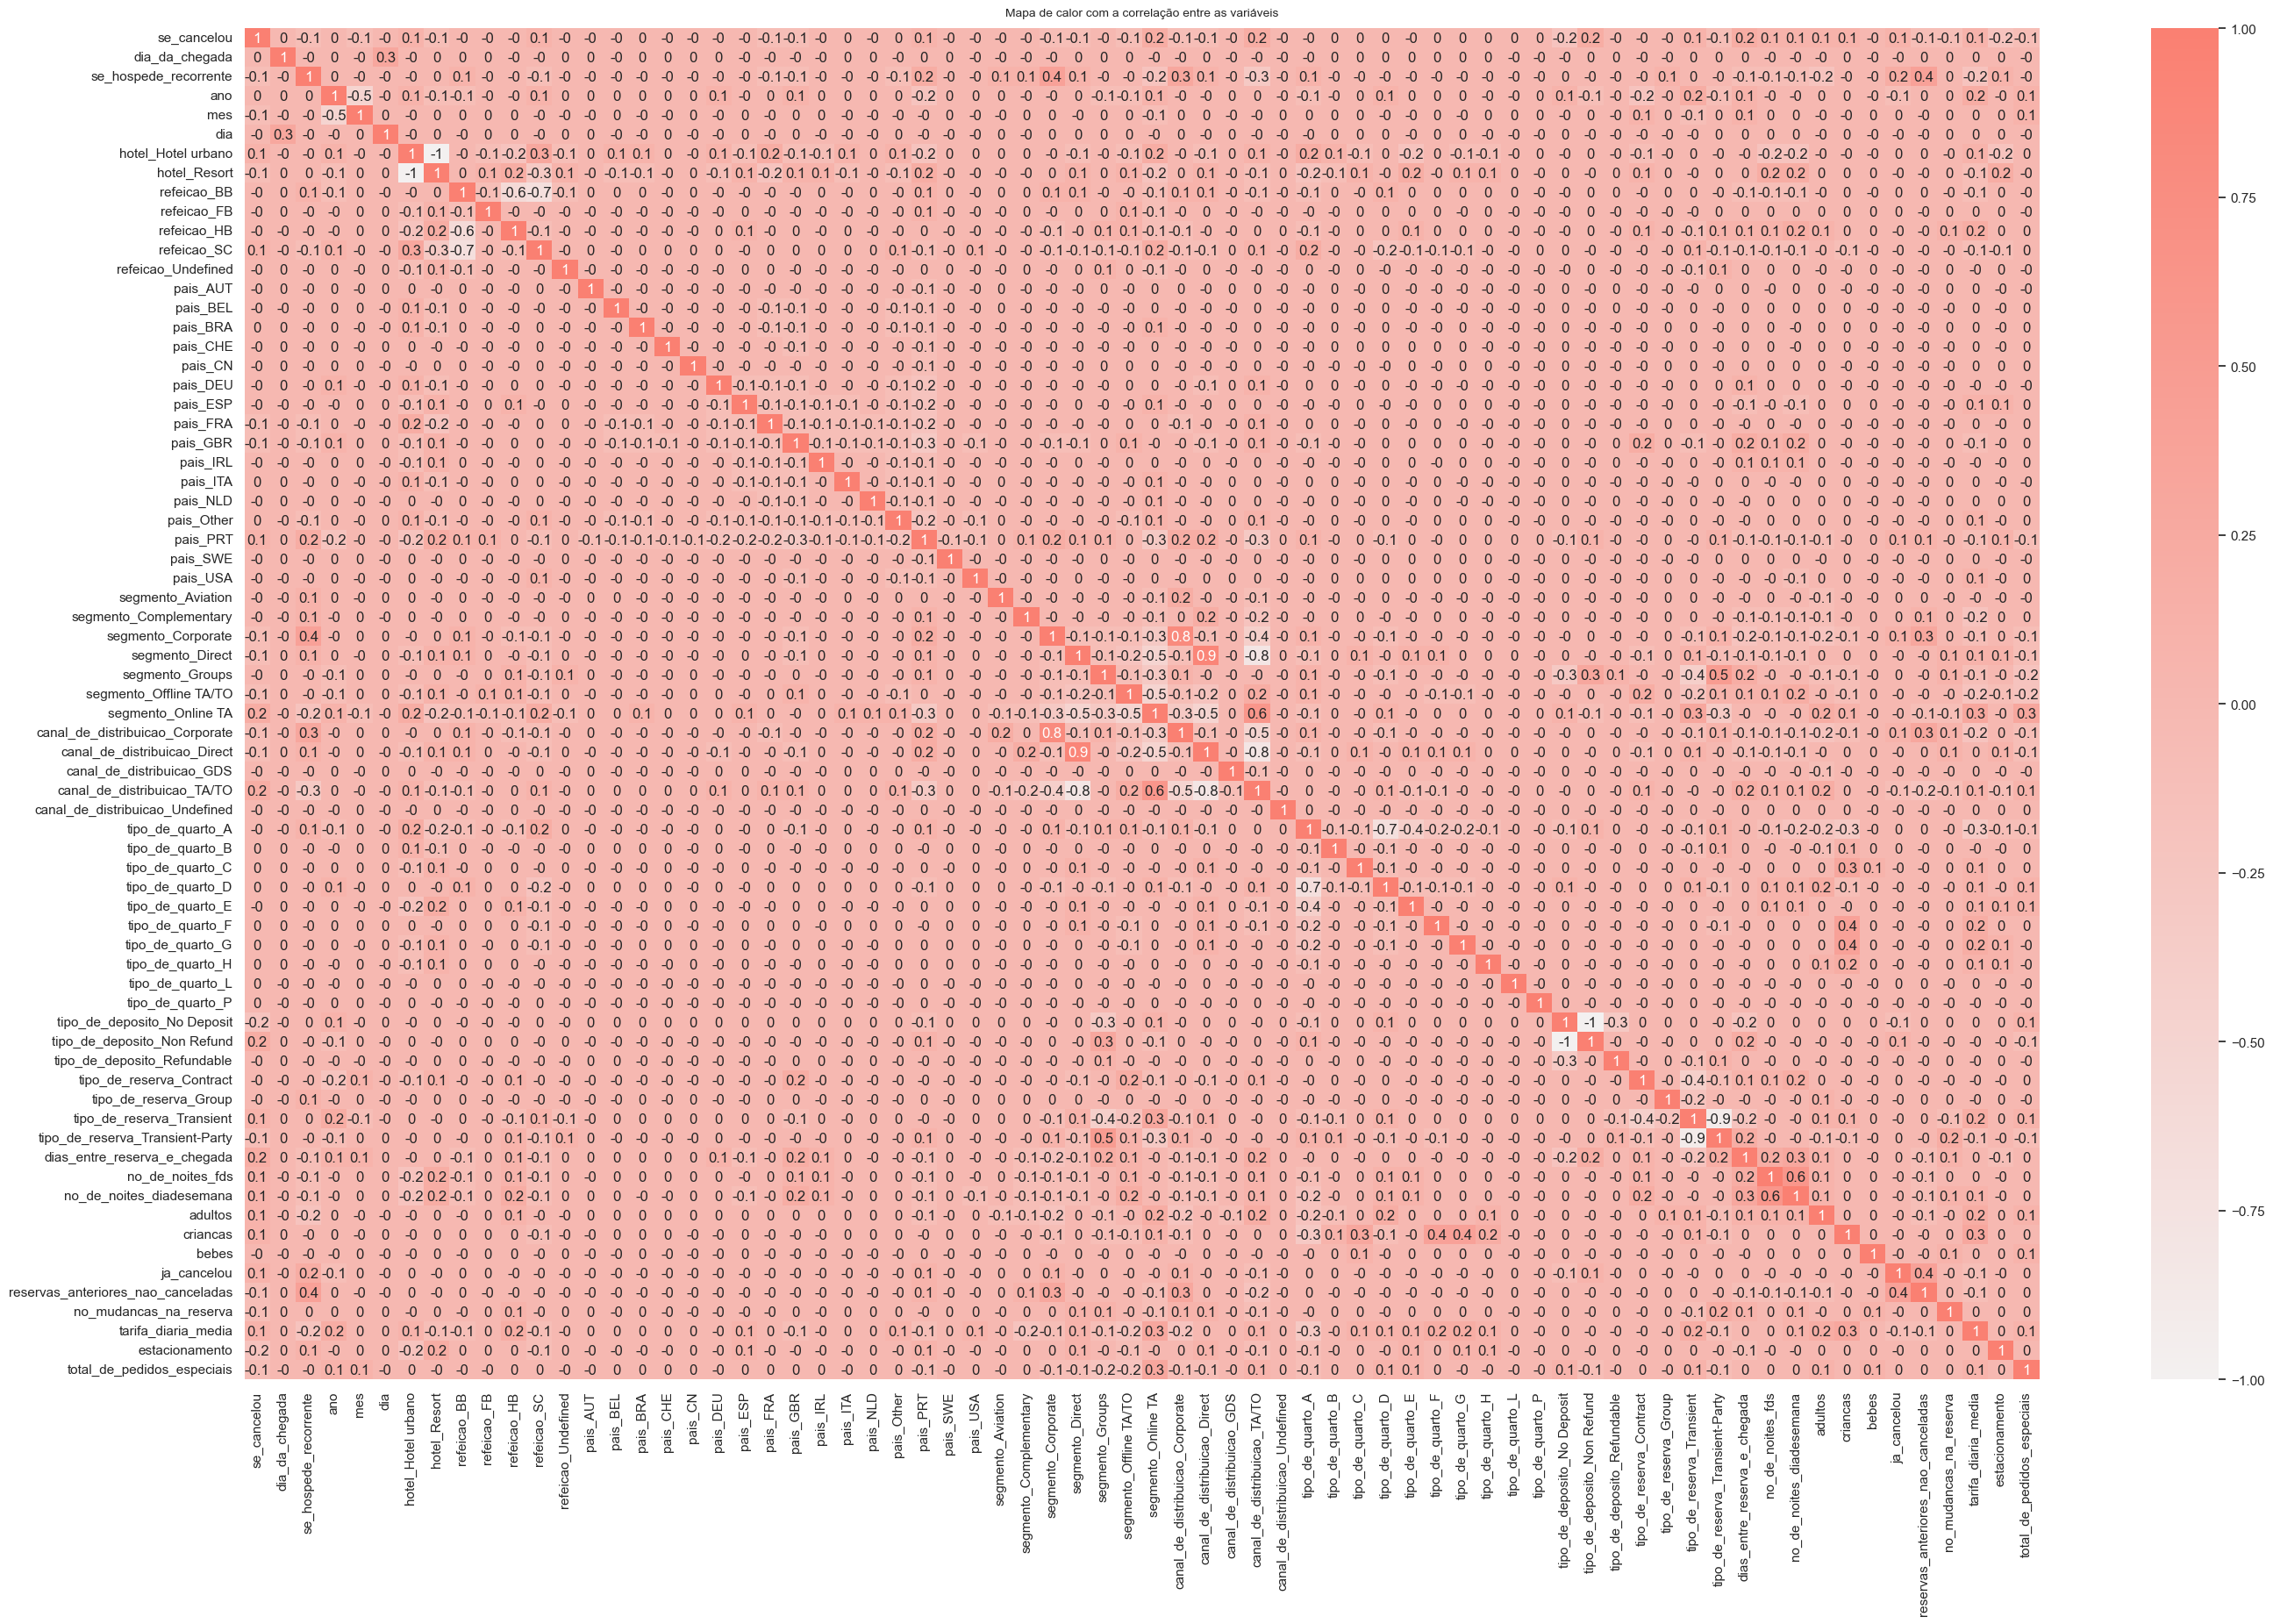

In [32]:
plt.figure(figsize=(33,20))
paleta = sns.color_palette('light:salmon', as_cmap=True)
sns.heatmap(correlacao.round(1), annot=True, cmap=paleta)
plt.title("Mapa de calor com a correlação entre as variáveis", fontsize=10, pad=10)
plt.savefig('mapacalor.png', format='png')
plt.show()

In [33]:
cols_before = dados_final.shape[1]

In [34]:
corr_matrix = dados_final.corr()

# Armazene as colunas cuja correlação é maior que 0.6 em uma lista
to_drop = []
for column1 in corr_matrix.columns:
    for column2 in corr_matrix.columns:
        if column1 != column2 and abs(corr_matrix[column1][column2]) > 0.6:
            to_drop.append(column2)

# Remova as colunas da lista "to_drop" do seu dataset, mantendo apenas as colunas únicas
to_drop = list(set(to_drop))
dados_final = dados_final.drop(columns=to_drop)

In [35]:
cols_after = dados_final.shape[1]

In [36]:
# Número de colunas removidas
cols_removed = cols_before - cols_after
cols_removed

16

In [37]:
column_names = dados_final.columns
print(column_names)

Index(['se_cancelou', 'dia_da_chegada', 'se_hospede_recorrente', 'ano', 'mes',
       'dia', 'refeicao_FB', 'refeicao_Undefined', 'pais_AUT', 'pais_BEL',
       'pais_BRA', 'pais_CHE', 'pais_CN', 'pais_DEU', 'pais_ESP', 'pais_FRA',
       'pais_GBR', 'pais_IRL', 'pais_ITA', 'pais_NLD', 'pais_Other',
       'pais_PRT', 'pais_SWE', 'pais_USA', 'segmento_Aviation',
       'segmento_Complementary', 'segmento_Groups', 'segmento_Offline TA/TO',
       'segmento_Online TA', 'canal_de_distribuicao_GDS',
       'canal_de_distribuicao_Undefined', 'tipo_de_quarto_B',
       'tipo_de_quarto_C', 'tipo_de_quarto_E', 'tipo_de_quarto_F',
       'tipo_de_quarto_G', 'tipo_de_quarto_H', 'tipo_de_quarto_L',
       'tipo_de_quarto_P', 'tipo_de_deposito_Refundable',
       'tipo_de_reserva_Contract', 'tipo_de_reserva_Group',
       'dias_entre_reserva_e_chegada', 'no_de_noites_fds',
       'no_de_noites_diadesemana', 'adultos', 'criancas', 'bebes',
       'ja_cancelou', 'reservas_anteriores_nao_canceladas',

# Modelo de Regressão Logística

In [38]:
# definindo as variáveis dependentes e independentes

Y=dados_final['se_cancelou']
X=dados_final.drop(['se_cancelou'], axis=1)

In [39]:
# criando os sets de treino e de teste

from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, Y, test_size = 0.3)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_training_data)
x_training_data = scaler.transform(x_training_data)
x_test_data = scaler.transform(x_test_data)

### Treinando os modelos

In [41]:
# importando, instanciando e aplicando a técnica de subamostragem aos dados de treinamento
from sklearn.model_selection import cross_validate
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(x_training_data, y_training_data)

In [42]:
logreg_balanced = cross_validate(LogisticRegression(), X_rus, y_rus, cv=5, scoring=['recall', 'precision', 'accuracy'])

In [43]:
trees_balanced = cross_validate(DecisionTreeClassifier(), X_rus, y_rus, cv=5, scoring=['recall', 'precision', 'accuracy'])

In [44]:
svm_balanced = cross_validate(SVC(), X_rus, y_rus, cv=5, scoring=['recall', 'precision', 'accuracy'])

In [45]:
summary = pd.DataFrame({
'labels': ['recall', 'precision', 'accuracy'],
'logreg_balanced': [logreg_balanced['test_recall'].mean(), logreg_balanced['test_precision'].mean(), logreg_balanced['test_accuracy'].mean()],
'trees_balanced': [trees_balanced['test_recall'].mean(), trees_balanced['test_precision'].mean(), trees_balanced['test_accuracy'].mean()],
'svm_balanced': [svm_balanced['test_recall'].mean(), svm_balanced['test_precision'].mean(), svm_balanced['test_accuracy'].mean()],
}
).set_index('labels')
summary.index.name=None

summary.style.applymap(lambda x: 'background-color: gray' if x >= 0.7 else '')

,logreg_balanced,trees_balanced,svm_balanced
recall,0.763365,0.799086,0.808699
precision,0.735320,0.800976,0.782921
accuracy,0.744289,0.800243,0.792203


A métrica escolhida para avaliar foi o Recall.

Para o nosso modelo de previsão, não existe tantos problemas com falsos positivos, o importante é que o máximo de positivos sejam determinados. Isso quer dizer que o modelo precisa prever muito bem quem irá cancelar para que o hotel tome alguma previdência que impeça o fato de ocorrer. Se o modelo disser que vai ocorrer o cancelamento por parte de alguém que não vai cancelar de fato, o prejuízo para o hotel é muito menor.

Como podemos notar, o modelo de Support Vector Machine (SVM) com validação cruzada e dados balanceados foi o que obteve o melhor valor de Recall, seguido pelo modelo de Árvore de Decisão e, por fim, o modelo de Regressão Logística.

## Ajuste de Hiperparâmetros

Agora vamos ajustar os hiperparâmetros usando GridSearchCV em todos esses três modelos. Para isso, consideraremos apenas o Recall para avaliação.

In [46]:
# ajustando Kernel e C para o SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

kfold = StratifiedKFold(n_splits=5, shuffle=True)

svm = SVC()

param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.001, 0.01, 1, 10, 100]
              }

search = GridSearchCV(svm, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_rus, y_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')

Best recall: 0.9826147617970348 for {'C': 0.001, 'kernel': 'poly'}


In [47]:
# ajustando o solver e C para o modelo de Regressão Logística

log_reg = LogisticRegression()

param_grid_reg = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.001, 0.01, 1, 10, 100]}

search_reg = GridSearchCV(log_reg, param_grid_reg, scoring='recall', cv=kfold)
result_reg = search_reg.fit(X_rus, y_rus)

print(f'Best recall: {result_reg.best_score_} for {result_reg.best_params_}')


Best recall: 0.7758259794881635 for {'C': 0.001, 'solver': 'liblinear'}


In [48]:
# ajustando, por fim, os hiperparâmtros para o modelo de Árvores de decisão

trees_balanced = DecisionTreeClassifier()

param_grid_tree = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1, 30),
              'min_samples_leaf': [1, 2, 4, 6]}

search_tree = GridSearchCV(trees_balanced, param_grid_tree, cv=5, scoring='recall')
result_tree = search_tree.fit(x_training_data, y_training_data)


print(f'Best recall: {result_tree.best_score_} for {result_tree.best_params_}')


Best recall: 0.7236697015123761 for {'criterion': 'entropy', 'max_depth': 28, 'min_samples_leaf': 1}


SVM ainda oferece o melhor Recall. A nossa última etapa é utilizar o conjunto de teste para avaliar se o modelo escolhido performa bem ou se apresenta alguma diferença significativa nos resultados gerados durante o treinamento.

              precision    recall  f1-score   support

           0       0.91      0.33      0.48     18945
           1       0.34      0.91      0.49      7130

    accuracy                           0.49     26075
   macro avg       0.62      0.62      0.49     26075
weighted avg       0.75      0.49      0.49     26075



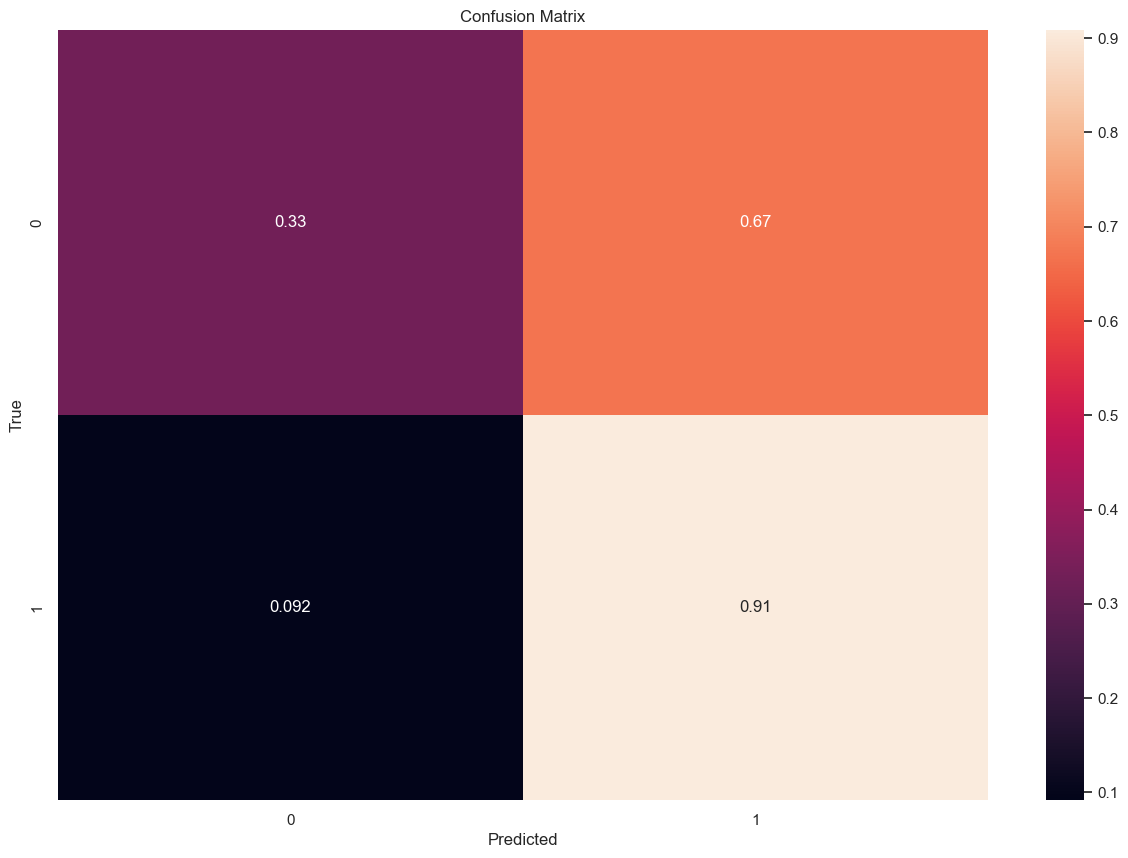

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_svm = SVC(kernel='poly', C=0.01)
model_svm.fit(X_rus, y_rus)
y_pred_svm = model_svm.predict(x_test_data)

print(classification_report(y_test_data, y_pred_svm))

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test_data, y_pred_svm, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('True')
ax.set_xlabel('Predicted')

plt.show()

O valor do Recall diminui um pouco, como é o normal quando se aplica o modelo nos dados de treino. Porém, ele ainda se mantém em um bom valor para as necessidades do nosso modelo.

Sobre a matriz de confusão:
    
True Positive (TP): 0.91 — isso significa que 91% dos exemplos que o modelo previu como positivos realmente são positivos.

False Positive (FP): 0.6 — isso significa que 67% dos exemplos que o modelo previu como positivos são na verdade negativos.

False Negative (FN): 0.092 — isso significa que 9,2% dos exemplos que o modelo previu como negativos são na verdade positivos.

True Negative (TN): 0.33 — isso significa que 33% dos exemplos que o modelo previu como negativos realmente são negativos.

Os resultados apresentados acima nos mostram que o modelo de Support Vector Machine (SVM) com validação cruzada, dados balanceados e ajuste de hiperparâmetros que utiliziamos é eficaz em prever se um hóspede vai cancelar a sua reserva no hotel. Com uma taxa de recall de 0.91, o modelo acertou em prever 91% das vezes que o hóspede realmente cancelou a reserva.

Esses resultados são úteis para um hotel pois eles podem ajudar a gerenciar as reservas de forma mais eficiente. Por exemplo, o hotel pode tomar medidas preventivas para evitar cancelamentos de reservas previstos pelo modelo, ou pode ajustar sua estratégia de marketing para incentivar hóspedes a não cancelarem suas reservas.